In [25]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

In [2]:
house1 = pd.read_csv('ukdale/house_1/channel_1.dat', sep=' ', header=None, names=['time', 'Volt-Ampere'])
house1

,time,Volt-Ampere
0,1352500095,599
1,1352500101,582
2,1352500107,600
3,1352500113,586
4,1352500120,596
...,...,...
21837631,1493227935,667
21837632,1493227942,667
21837633,1493227948,686
21837634,1493227954,667


## Convert to 5mins, 10mins, 20mins, 30mins

- Conversion Logic
Given Watts
    - Take average Watts used for 5mins of 6s interval data
    - Convert to kWh by multiplying with time (5mins) and divide kilos

In [27]:
# minutes interval
mins = 5

# 5mins since every time interval is 6s
N = (mins*60)//6

# sum every 5 mins
# house1.groupby(house1.index // N).sum()

# find kilowatt hour for each data by watt * 6s/1hr * 1/1000
house1_5mins = house1.groupby(house1.index // N).sum() * (6/3600) / 1000
house1_5mins.describe()

,time,Volt-Ampere
count,436753.000000,436753.000000
mean,118724.863167,0.031460
std,3301.538035,0.031567
min,89593.671105,0.009333
25%,115881.028967,0.016545
50%,118719.900410,0.021678
75%,121589.894148,0.034632
max,124435.628790,0.527148


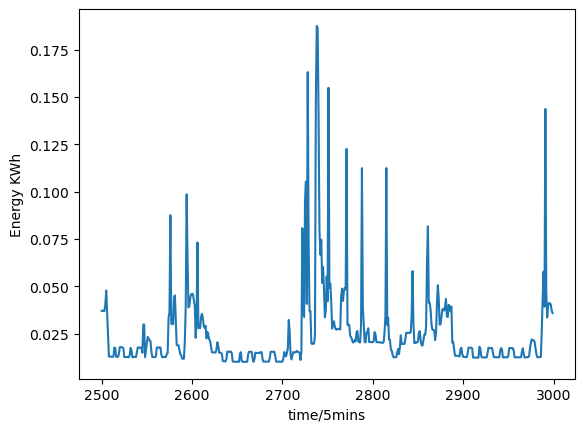

In [37]:
plt.plot(list(house1_5mins.index.values)[2500:3000], house1_5mins['Volt-Ampere'][2500:3000])
plt.xlabel("time/5mins")
plt.ylabel("Energy KWh")


plt.show()

In [38]:
house1_5mins.to_csv ('data ukdale/house1_5mins.csv', index=None)

## 10mins onwards

In [23]:
# minutes interval
mins = 10

# 10mins since every time interval is 6s
N = (mins*60)//6

# sum every 10 mins
# house1.groupby(house1.index // N).sum()

# find kilowatt hour for each data by watt * 6s/1hr * 1/1000
house1_10mins = house1.groupby(house1.index // N).sum() * (6/3600) / 1000 / 2 # Divide 2 for consistency with 5mins?
house1_10mins.describe()

,time,Volt-Ampere
count,218377.000000,218377.000000
mean,118724.591332,0.031460
std,3305.032153,0.029169
min,44796.835553,0.010094
25%,115881.016325,0.016650
50%,118719.887843,0.021846
75%,121589.881297,0.035673
max,124435.609012,0.437833


In [5]:
# minutes interval
mins = 15

# 10mins since every time interval is 6s
N = (mins*60)//6

# sum every 15 mins
# house1.groupby(house1.index // N).sum()

# sum every 15mins in terms of kWh - average watt for 15mins/60mins divide by kilo(1000)
house1_15mins = house1.groupby(house1.index // N).sum() / N * (mins/60) / 1000
house1_15mins.describe()

,time,Volt-Ampere
count,145585.000000,145585.000000
mean,356172.958497,0.094381
std,9928.344798,0.082623
min,89593.671105,0.030337
25%,347643.011038,0.050140
50%,356159.625812,0.065987
75%,364769.605295,0.109307
max,373306.775778,1.214147


In [6]:
# minutes interval
mins = 20

# 10mins since every time interval is 6s
N = (mins*60)//6

# sum every 20 mins
# house1.groupby(house1.index // N).sum()

# sum every 20mins in terms of kWh - average watt for 20mins/60mins divide by kilo(1000)
house1_20mins = house1.groupby(house1.index // N).sum() / N * (mins/60) / 1000
house1_20mins.describe()

,time,Volt-Ampere
count,109189.000000,109189.000000
mean,474896.190667,0.125841
std,13256.358208,0.104419
min,89593.671105,0.040495
25%,463523.964140,0.067033
50%,474879.450793,0.088428
75%,486359.422282,0.148155
max,497742.307738,1.418410
